## Домашнее задание 9
### Градиентный бустинг

В данном домашнем задании мы изучим применение градиентного бустинга для решения реальных задач.
  
Мы будем использовать данные об аренде квартир сервиса Яндекс.Недвижимость: по информации из объявления предсказывать время его экспозиции на сервисе.  

Метрикой качества в данном задании является средняя абсолютная ошибка, MAE.

In [ ]:
! wget https://www.dropbox.com/s/psutl0zafq50828/data.tsv > ./data.tsv

In [ ]:
! pip install catboost==0.22
! pip install lightgbm==2.3.1

------

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
data = pd.read_csv('data.txt', header=None)
data = data[0].tolist()
# print(data)
# new_data = data[0][:50].tolist()
# print(new_data)


In [ ]:
X = []
xobject = []
for i in range(5101469):
  if data[i] == '-----':
    X.append(xobject)
    xobject = []
    continue
  parts = data[i].split(' ')
  xobject.append(parts[1])
X.append(xobject)

In [ ]:
print(len(X))
print(X[-1])

283415
['-1.', '0', '0', '10', '2017-07-01T00:00:00+03:00', '12', '15', '10.', '20.', 'June', '32000', '0', '1', 'false', '40.', '15', 'Россия']


----

In [ ]:
import pandas as pd
import catboost
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = pd.read_table('./data.tsv.1')
num_features = ['agent_fee', 'floor', 'floors_total', 'kitchen_area', 'living_area', 'price', 'rooms_offered', 'total_area', 'total_images']
cat_features = ['balcony', 'building_type', 'month', 'renovation', 'studio']

X_train, X_test, y_train, y_test = train_test_split(data[num_features+cat_features], data['exposition_time'], test_size=0.3, shuffle=False)

__Задание 1.__

Обучите реализации градиентного бустинга LightGBM и Catboost на **вещественных** признаках без подбора параметров. Сделайте предсказания для тестовой выборки, посчитайте MAE. Выведите модуль разности между значениями метрик LightGBM и Catboost. Ответ округлите до тысячных.

В этом и последующих экспериментах советуем измерять время обучения моделей.

In [ ]:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(data[num_features], data['exposition_time'], test_size=0.3, shuffle=False)

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

lgbm = LGBMRegressor()
lgbm.fit(X_train_num, y_train_num)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
mae_lgbm = mean_absolute_error(lgbm.predict(X_test), y_test)
mae_lgbm

36.498598720526246

In [ ]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor()
cb.fit(X_train_num, y_train_num)

Learning rate set to 0.100083
0:	learn: 82.6499469	total: 106ms	remaining: 1m 45s
1:	learn: 82.3368081	total: 139ms	remaining: 1m 9s
2:	learn: 82.0661517	total: 185ms	remaining: 1m 1s
3:	learn: 81.8512495	total: 219ms	remaining: 54.6s
4:	learn: 81.6824372	total: 266ms	remaining: 53s
5:	learn: 81.5239824	total: 303ms	remaining: 50.1s
6:	learn: 81.3974308	total: 340ms	remaining: 48.3s
7:	learn: 81.3035215	total: 374ms	remaining: 46.4s
8:	learn: 81.2044516	total: 422ms	remaining: 46.5s
9:	learn: 81.1124853	total: 458ms	remaining: 45.3s
10:	learn: 81.0335233	total: 497ms	remaining: 44.7s
11:	learn: 80.9804140	total: 531ms	remaining: 43.7s
12:	learn: 80.9353553	total: 566ms	remaining: 42.9s
13:	learn: 80.8969679	total: 601ms	remaining: 42.3s
14:	learn: 80.8521609	total: 649ms	remaining: 42.6s
15:	learn: 80.8246097	total: 685ms	remaining: 42.1s
16:	learn: 80.7999730	total: 719ms	remaining: 41.6s
17:	learn: 80.7747817	total: 752ms	remaining: 41s
18:	learn: 80.7429448	total: 786ms	remaining: 4

In [ ]:
mae_cb = mean_absolute_error(cb.predict(X_test_num), y_test_num)
mae_cb

36.35187053009413

In [ ]:
round(abs(mae_lgbm - mae_cb), 3)

0.147

__Задание 2.__

Подберите оптимальные параметры для Catboost на вещественных признаках,  используя все доступные комбинации из:

* глубины деревьев {5, 7, 9};
* темпа обучения {0.05, 0.1, 0.5}.

В качестве оптимизируемого функционала в алгоритме используйте MAE (loss_function='MAE'), random_seed=0, другие параметры оставьте без изменений.

Сделайте предсказания для тестовой выборки лучшей моделью, вычислите MAE.

In [ ]:
from catboost import CatBoostRegressor

depths = [5, 7, 9]
paces = [0.05, 0.1, 0.5]
mae_list = []

depths = [5]
paces = [0.05]

for i in range(len(depths)):
  depth = depths[i]
  for j in range(len(paces)):
    pace = paces[j]
    clf = CatBoostRegressor(random_seed=0, loss_function='MAE', depth=depth, learning_rate=pace)
    clf.fit(X_train_num, y_train_num)
    mae_list.append(mean_absolute_error(clf.predict(X_test_num), y_test_num))
    if len(mae_list) == 1:
      best_clf = clf
      best_mae = mae_list[0]
    elif mae_list[len(mae_list)-1] < best_mae:
      best_clf = clf
      best_mae = mae_list[len(mae_list)-1]
print(mae_list)
print(mean_absolute_error(best_clf.predict(X_test_num), y_test_num))


0:	learn: 38.4334697	total: 47.6ms	remaining: 47.6s
1:	learn: 38.1789094	total: 94.8ms	remaining: 47.3s
2:	learn: 37.9456019	total: 143ms	remaining: 47.7s
3:	learn: 37.7375735	total: 189ms	remaining: 47s
4:	learn: 37.5421646	total: 235ms	remaining: 46.8s
5:	learn: 37.3645834	total: 288ms	remaining: 47.7s
6:	learn: 37.2029280	total: 334ms	remaining: 47.3s
7:	learn: 37.0570977	total: 379ms	remaining: 47s
8:	learn: 36.9121677	total: 424ms	remaining: 46.7s
9:	learn: 36.7815607	total: 470ms	remaining: 46.5s
10:	learn: 36.6605754	total: 520ms	remaining: 46.8s
11:	learn: 36.5472376	total: 566ms	remaining: 46.6s
12:	learn: 36.4506525	total: 613ms	remaining: 46.6s
13:	learn: 36.3508923	total: 658ms	remaining: 46.4s
14:	learn: 36.2639021	total: 704ms	remaining: 46.3s
15:	learn: 36.1720345	total: 754ms	remaining: 46.3s
16:	learn: 36.0915344	total: 803ms	remaining: 46.5s
17:	learn: 36.0187448	total: 848ms	remaining: 46.2s
18:	learn: 35.9529836	total: 893ms	remaining: 46.1s
19:	learn: 35.8924928	to

[31.641329495403955, 31.666597555668933, 32.03449635593659, 31.65088635072659, 31.718876336853853, 32.20464448102391, 31.699908737773335, 31.81082673689335, 32.980140337677646]
31.641329495403955

__Задание 3.__

Пока что мы использовали только вещественные данные, однако категориальные переменные также могут быть полезны для решения задачи. Перебирая комбинации параметров из предыдущего пункта, используйте все доступные признаки, обрабатывая категориальные встроенным методом Catboost.

Выведите значение MAE на тестовой выборке для лучшей модели.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[num_features+cat_features], data['exposition_time'], test_size=0.3, shuffle=False)

In [ ]:
depths = [5, 7, 9]
paces = [0.05, 0.1, 0.5]
mae_list = []

for i in range(len(depths)):
  depth = depths[i]
  for j in range(len(paces)):
    pace = paces[j]
    clf = CatBoostRegressor(random_seed=0, loss_function='MAE', depth=depth, learning_rate=pace,
                            cat_features=['balcony', 'building_type', 'month', 'renovation', 'studio'])
    clf.fit(X_train, y_train)
    mae_list.append(mean_absolute_error(clf.predict(X_test), y_test))
    if len(mae_list) == 1:
      best_clf_full = clf
      best_mae = mae_list[0]
    elif mae_list[len(mae_list)-1] < best_mae:
      best_clf_full = clf
      best_mae = mae_list[len(mae_list)-1]
print(mae_list)
print(mean_absolute_error(best_clf_full.predict(X_test), y_test))

[32.3722251326191, 34.930778136450144, 36.91337869277467, 32.81788765740183, 34.48198449635924, 42.54822213650881, 34.5786073876299, 36.20209330451235, 44.83007795462268]


Лучший MAE: 32.3722251326191

__Задание 4.__

Реализуйте блендинг (получение ответов нескольких моделей и взятие их с весами (их нужно подбирать на обучающей выборке)) полученных в заданиях 2 и 3 моделей и выведите MAE на тестовой выборке.

Обратите внимание: в этом задании нет ограничений на веса у моделей.

In [ ]:
from sklearn.linear_model import LinearRegression

def select_weights(y_true, y_pred_1, y_pred_2):
    metric = []
    grid = np.linspace(-1, 1, 5000)
    for w_0 in grid:
      w_1 = 1 - w_0
      y = y_pred_1 * w_0 + y_pred_2 * w_1

      metric.append([mean_absolute_error(y_true, y), w_0, w_1])

    return metric

In [ ]:
y_train_pred_cbm1 = best_clf.predict(X_train_num)

In [ ]:
y_train_pred_cbm2 = best_clf_full.predict(X_train)

In [ ]:
y_test_pred_cbm1 = best_clf.predict(X_test_num)
y_test_pred_cbm2 = best_clf_full.predict(X_test)

In [ ]:
mae_blending_train, w_0, w_1 = min(select_weights(y_test, y_test_pred_cbm1, y_test_pred_cbm2), key=lambda x: x[0])
round(mae_blending_train, 3), w_0, w_1

(31.641, 0.993998799759952, 0.006001200240048021)

__Задание 5.__

В задании 3 вы подобрали гиперпараметры для CatBoost на всех признаках. Визуализируйте их важности в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (значения менее 0.05; обычно по bar-plot хорошо видно порог, с которого начинается хвост неважных признаков) и обучите модель с теми же параметрами на оставшихся признаках. Выведите разность между значениями MAE на тестовой выборке до и после удаления признаков.

In [ ]:
best_clf_full.feature_importances_ 

array([1.71496074e+01, 1.52050277e+00, 1.88540734e+00, 1.34370556e+01,
       3.70673398e+00, 1.15635341e+01, 9.58355751e-01, 3.41125129e+00,
       4.93755680e+00, 1.04885644e+00, 2.54129141e+00, 1.99479811e+01,
       1.78824067e+01, 9.45933850e-03])

<BarContainer object of 14 artists>

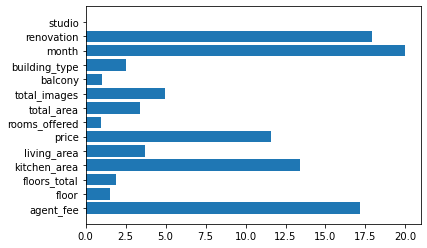

In [ ]:
from matplotlib import pyplot as plt

x = num_features + cat_features
y = best_clf_full.feature_importances_
# plt.xticks(rotation=90)
plt.barh(x, y)

([<matplotlib.axis.YTick at 0x7f18f0316c10>,
 [Text(0, 0, 'studio'),
  Text(0, 0, 'rooms_offered'),
  Text(0, 0, 'balcony'),
  Text(0, 0, 'floor'),
  Text(0, 0, 'floors_total'),
  Text(0, 0, 'building_type'),
  Text(0, 0, 'total_area'),
  Text(0, 0, 'living_area'),
  Text(0, 0, 'total_images'),
  Text(0, 0, 'price'),
  Text(0, 0, 'kitchen_area'),
  Text(0, 0, 'agent_fee'),
  Text(0, 0, 'renovation'),
  Text(0, 0, 'month')])

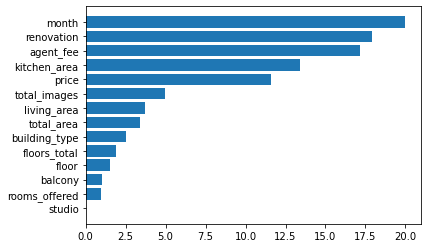

In [ ]:
# Выведем то же самое, только в отсортированном порядке. Рассматривал разные варианты, этот более-менее
features = x
weights = y
a = list(zip(features, weights))
a.sort(key=lambda tup: tup[1]) # получили отсортированный список кортежей
plt.barh(range(len(a)), [x[1] for x in a], align='center')
plt.yticks(range(len(a)), [x[0] for x in a])

In [ ]:
y

[19.94798105076664,
 17.882406668765007,
 17.149607429954717,
 13.437055619445097,
 11.563534114654338,
 4.937556796870227,
 3.706733975735805,
 3.4112512906247225,
 2.5412914107743765,
 1.8854073408834195,
 1.5205027741076083,
 1.0488564375628568,
 0.9583557513548779,
 0.00945933850023008]

In [ ]:
depths = [5]
paces = [0.05]
mae_list = []

for i in range(len(depths)):
  depth = depths[i]
  for j in range(len(paces)):
    pace = paces[j]
    clf = CatBoostRegressor(random_seed=0, loss_function='MAE', depth=depth, learning_rate=pace,
                            cat_features=['balcony', 'building_type', 'month', 'renovation', 'studio'],
                            ignored_features=['studio'])
    clf.fit(X_train, y_train)
    mae_list.append(mean_absolute_error(clf.predict(X_test), y_test))
    if len(mae_list) == 1:
      best_clf_full1 = clf
      best_mae = mae_list[0]
    elif mae_list[len(mae_list)-1] < best_mae:
      best_clf_full1 = clf
      best_mae = mae_list[len(mae_list)-1]
print(mae_list)
print(mean_absolute_error(best_clf_full1.predict(X_test), y_test))

0:	learn: 38.4040845	total: 183ms	remaining: 3m 3s
1:	learn: 38.0532141	total: 363ms	remaining: 3m 1s
2:	learn: 37.7643567	total: 532ms	remaining: 2m 56s
3:	learn: 37.4978316	total: 692ms	remaining: 2m 52s
4:	learn: 37.2762200	total: 857ms	remaining: 2m 50s
5:	learn: 37.0322163	total: 1.03s	remaining: 2m 50s
6:	learn: 36.8079535	total: 1.18s	remaining: 2m 46s
7:	learn: 36.6054470	total: 1.32s	remaining: 2m 43s
8:	learn: 36.4075283	total: 1.49s	remaining: 2m 43s
9:	learn: 36.2582893	total: 1.64s	remaining: 2m 42s
10:	learn: 36.1064275	total: 1.8s	remaining: 2m 41s
11:	learn: 35.9484082	total: 1.96s	remaining: 2m 41s
12:	learn: 35.8064674	total: 2.11s	remaining: 2m 40s
13:	learn: 35.7009083	total: 2.28s	remaining: 2m 40s
14:	learn: 35.5899697	total: 2.43s	remaining: 2m 39s
15:	learn: 35.4637127	total: 2.59s	remaining: 2m 39s
16:	learn: 35.3467677	total: 2.74s	remaining: 2m 38s
17:	learn: 35.2405136	total: 2.9s	remaining: 2m 38s
18:	learn: 35.1480855	total: 3.04s	remaining: 2m 37s
19:	lea

In [ ]:
32.87901080359151 - 32.3722251326191

0.5067856709724126